In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [54]:
# Read the data
data1 = pd.read_csv('California_Housing_Data_Part1.csv')

In [55]:
# Train-test split
data1_indep = data1.drop("median_house_value", axis=1)
data1_dep = data1["median_house_value"].copy()

X_train, X_test, y_train, y_test = train_test_split(data1_indep, data1_dep, test_size=0.2, shuffle=False)

In [59]:
# Scale y_train and y_test
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [60]:
# Create a pipeline that Standardizes the data, then runs a Randon Forest Regressor
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rf_reg', RandomForestRegressor())
])

In [62]:
# Use GridSearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to search
param_grid = [
    {'rf_reg__n_estimators': [3, 10, 30], 'rf_reg__max_features': [2, 4, 6, 8, 12]}
]

# Create a grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

# Fit to the training data
grid_search.fit(X_train, y_train.ravel())

# Find the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Best hyperparameters: {'rf_reg__max_features': 2, 'rf_reg__n_estimators': 30}
Best score: -0.39275275894222417
Best RMSE: 0.6266998954381787


MSE for Linear Regression on test data:  0.04717383523830279


C:\Users\usama\AppData\Local\Temp\ipykernel_29236\4121207825.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


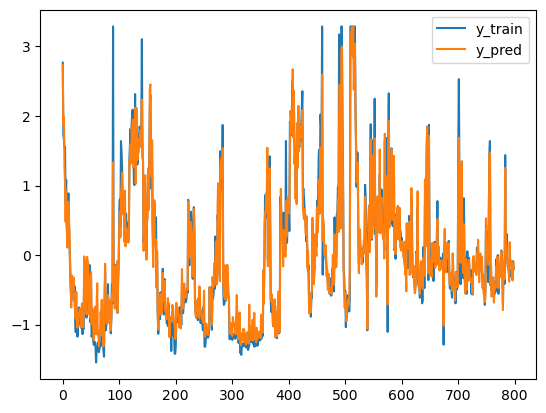

In [63]:
# Test the model (Random Forest) on training data
# Create a model with the best hyperparameters
model = RandomForestRegressor(max_features=8, n_estimators=30)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_train)

# Calculate the MSE
mse = mean_squared_error(y_train, y_pred)

# Print the MSE
print("MSE for Linear Regression on test data: ", mse)

# Visualize the y_pred and y_test
plt.plot(y_train, label='y_train')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()

MSE for Linear Regression on test data:  0.3556277195169637


C:\Users\usama\AppData\Local\Temp\ipykernel_29236\3546834724.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


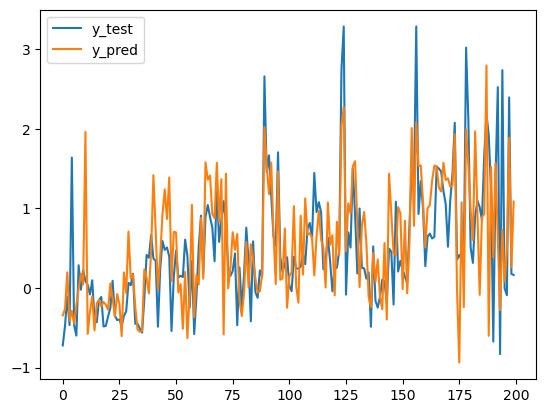

In [64]:
# Test the model (Random Forest) on testing data
# Create a model with the best hyperparameters
model = RandomForestRegressor(max_features=8, n_estimators=30)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print("MSE for Linear Regression on test data: ", mse)

# Visualize the y_pred and y_test
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()